# Report machine learning project : football match prediction
**Authors**: Arradi Naoufal, Bienfait Méo, Bouchakour Younes, Sergent Pierre-Louis, Tadjer Badr

## Subject

For our machine learning class we had to do a project. We decided to choose a subject that was interesting for everyone, since the majority of our group was into football we decided to find a problematic around this topic.

The two ideas were:
- predicting future football games results
- predicting football games results based on stats

The first subject appeared to be more complicated, both in terms of data gathering with different type of data (form of players, roaster of the game, previous game stats of the season) and data analysis with several dataset to train.

Thereby we chose the second topic. The idea would be to use supervised algorithms with game stats of passed matches, and then try to determine the winners/losers of other games. We could then assess which metric has the most influence on the results and **establish the best scenario to win a football game**.

## Dataset

After looking for datasets online we thought it would be more useful to use an API instead. This way we have more control on our data and we can also extend our dataset at will by adding more season stats.

For this project we used the API of [Sportmonks](https://www.sportmonks.com/) as it provided the necessary data with enough free calls per hour (180) to play around with the data. The code written to extract the data from the API is accessible in [this files](https://github.com/PLsergent/football_match_prediction/blob/main/sport_monks_api.py).

Therefore we can use the class `SportmonksAPI(season_id: int, league_id: int)` that will get all the stats of all games for a given season and league. The attribute `rows_data` will then contain a list of list of game stats.

### Columns

**Shots**:
- total
- ongoal
- offgoal
- insidebox
- outsidebox

**Passes**:
- total
- percentage(of completed pass)

**Attacks**:
- total
- dangerous

**Others**:
- Fouls
- Corners
- Possession_time
- Yellow_cards
- Red_cards
- Saves
- Substitutions
- Tackles
- Penalties
- Injuries

**Output**: win = 1, draw = 0, loss = -1

### Game stats pre processing

*Included in the python code.*

In order to have relevant data for our model, we will get all the stats for every game in a season, and then we will compare the two teams of each match by subtracting their stats to one another. Hence we can keep track of the dominance of each team in specific areas. Indeed we thought that the stats themselves would not be sufficient to train our model as we would lose the sense of "confrontation" between two teams. A team could win a game with 400 passes but lose the next game with the same amount of passes. A stat is relevant only when compared to the opposing team.

So **each line** of our dataset represent in reality **the team stats minus the opposing team stats for this game**.

**Example**:
||round|passes|shots|attacks|penalties|red_cards|output|
|-|-|-|-|-|-|-|-|
|team a|1|200|3|10|0|0|1|
|team b|1|-200|-3|-10|0|0|-1|

Here the *team a* did 200 **more** passes than his opponent, and had 3 **more** shots.
The *team b* did 200 **less** passes than his opponent, and had 3 **less** shots.

### Collecting data

In [1]:
# Collect data from API

import pandas as pd
from sport_monks_api import SportmonksAPI

data2020_2021_scot = SportmonksAPI(season_id=17141).rows_data
data2020_2021_dan = SportmonksAPI(season_id=17328, league_id=271).rows_data
data2019_2020_dan = SportmonksAPI(season_id=16020, league_id=271).rows_data

data = data2020_2021_scot + data2020_2021_dan + data2019_2020_dan


# Create dataframe

columns = ["team_ids", "round_ids", "shots_total", "shots_ongoal", "shots_offgoal", "shots_insidebox", "shots_outsidebox",
"passes_total", "passes_percentage", "attacks_total", "attacks_dangerous", "fouls", "corners",
"possession_time", "yellow_cards", "red_cards", "saves", "substitutions", "tackles", "penalties", "injuries", "results"]

df = pd.DataFrame(data=data, columns=columns)


# Export to .csv

df.to_csv("./data/data_extended.csv")

df

Api call: page1 for rounds/season/17141
Api call: page1 for fixtures/between/2020-08-01/2021-05-16
Api call: page2 for fixtures/between/2020-08-01/2021-05-16
Api call: page3 for fixtures/between/2020-08-01/2021-05-16
Api call: page1 for rounds/season/17328
Api call: page1 for fixtures/between/2020-09-11/2021-05-24
Api call: page2 for fixtures/between/2020-09-11/2021-05-24
Api call: page1 for rounds/season/16020
Api call: page1 for fixtures/between/2019-07-12/2020-07-08
Api call: page2 for fixtures/between/2019-07-12/2020-07-08
Api call: page3 for fixtures/between/2019-07-12/2020-07-08


,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,NaN,NaN,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,NaN,NaN,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,NaN,2.0,-1.0,-6.0,NaN,NaN,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,NaN,-2.0,1.0,6.0,NaN,NaN,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,NaN,0.0,0.0,-2.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,NaN,NaN,2.0,1.0,1.0,NaN,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,NaN,2.0,-1.0,8.0,NaN,1.0,-1
1279,86,194388,9,4.0,5.0,6.0,3.0,264.0,9.16,31.0,...,6.0,28,0.0,NaN,-2.0,1.0,-8.0,NaN,-1.0,1
1280,2650,194388,1,-1.0,2.0,7.0,-3.0,-65.0,-4.16,10.0,...,-1.0,-10,NaN,NaN,0.0,1.0,-4.0,1.0,2.0,0


## Model training

*During our work we first used a dataframe with a shape of (456, 22), equivalent to a full season of 228 games. It appeared along the way that we needed more data. We then fetched 3 seasons resulting in a dataframe of 1282 rows, i.e. 641 games. The results were not significantly better with the second "extended" dataset but we will present our work based on this one as we mostly used it.*

### Pre processing

As we created the dataset ourself the cleaning of the data was pretty straight forward. We had some null values but we knew that a null value could be replace by 0 since it just meant that the stat didn't occur during the game. On the other hand, according to the way we build our dataset, the mean of the data of each column would be 0 anyway.

Also, as we had only numerical values we didn't have to convert any values.

In [9]:
df.fillna(0, inplace=True)
df.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

We also wrote a function that allow us to see the repartition of the outcome of the games.

             total  percentage
results                       
draw           154        24.0
win_or_loss    487        76.0

Total games: 641


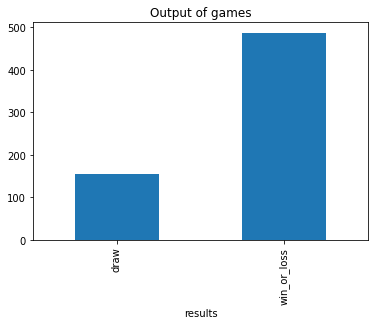

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def game_output_results(df_in=df):
    df = pd.DataFrame()
    df["total"] = df_in.groupby("results").size()

    df.drop(index=-1, inplace=True)
    df.rename(index={0: "draw", 1: "win_or_loss"}, inplace=True)

    df.iloc[0]["total"] = df.iloc[0]["total"]/2

    df["percentage"] = round(df["total"] / (df_in.shape[0]//2) * 100)

    print(f"{df}\n")
    print(f"Total games: {df_in.shape[0]//2}")

    df["total"].plot(kind="bar", title="Output of games")
    plt.show()

game_output_results()

We can see that we have 154 draw games and 487 decisive games (with a winner). We have significantly less draw games.

*We actually tried to extend our data by duplicating draw games rows in order to have the same amount of draw/win or lose. But it didn't really improve our model so we will not mention it in details.*

We can then define our predictors. Note that after a few tries we remove the following columns `{"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}` since we thought they wouldn't bring any value to the prediction.

In [5]:
predictors = df.columns[2:-1]
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)
print(sorted(predictors))

['attacks_dangerous', 'attacks_total', 'corners', 'passes_percentage', 'passes_total', 'penalties', 'possession_time', 'red_cards', 'saves', 'shots_insidebox', 'shots_offgoal', 'shots_ongoal', 'shots_outsidebox', 'shots_total']


### Logistic Regression

We then proceed to train our model first with the Logistic Regression algorithm. Nothing particular here, despite the fact that we had to change the solver to `newton-cg` in order to support multiclass classification and also the multi_class parameter to `multinomial`.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df["results"])
x = pd.DataFrame(data=df[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf = LogisticRegression(random_state=1, solver="newton-cg", multi_class="multinomial")
clf.fit(X_train, y_train.values.ravel())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)
train accuracy = 0.6633221850613155
test accuracy = 0.6571428571428571


We have a test accuracy of 65% which is pretty low, although it's not that bad considering that a random algorithm would get around 33%. To confirm this result we used the cross validation.

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, df[predictors], df["results"], scoring='accuracy', cv=10)
print("Mean:", scores.mean())

Mean: 0.6551659399224806


We found roughly the same accuracy with 65%. At this point we wanted to try other algorithm to see if we could find a better accuracy. Also other models provide a `feature_importances_` attribute that could help use to determine the most important stat in a football game.

### Others models

| Model                   | Train acc | Test acc | Feature importance                                       |
|-------------------------|-----------|----------|----------------------------------------------------------|
| Decision Tree           | 0.63      | 0.62     | shots_ongoal, saves                                      |
| Gradient Boosting       | 0.64      | 0.63     | shots_ongoal, saves                                      |
| K-nearest neighbors     | 0.49      | 0.45     | /                                                        |
| Random Forest           | 0.78      | 0.64     | shots_ongoal, shots_total, shots_insidebox, passes_total |
| Support-vector Machine  | 0.51      | 0.49     | /                                                        |

We can see that despite SVM and KNN we got similar result in term of accuracy.

*Note that we used GridSearch for Decision Tree, Gradient Boosting, and Random Forest algorithms. But for the purpose of the report we will not detail the code and give directly the parameters we found.*

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


clf_dt = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=25, min_samples_split=10)

clf_dt.fit(X_train, y_train.values.ravel())
print ('[Decision Tree] train accuracy =', clf_dt.score(X_train, y_train))
print ('[Decision Tree] test accuracy =', clf_dt.score(X_test, y_test), "\n")

##

clf_rf = RandomForestClassifier(random_state=1, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=40)

clf_rf.fit(X_train, y_train.values.ravel())
print ('[Random Forest] train accuracy =', clf_rf.score(X_train, y_train))
print ('[Random Forest] test accuracy =', clf_rf.score(X_test, y_test), "\n")

##

clf_gb = GradientBoostingClassifier(random_state=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

clf_gb.fit(X_train, y_train.values.ravel())
print ('[Gradient Boosting] train accuracy =', clf_gb.score(X_train, y_train))
print ('[Gradient Boosting] test accuracy =', clf_gb.score(X_test, y_test))

[Decision Tree] train accuracy = 0.6376811594202898
[Decision Tree] test accuracy = 0.6285714285714286 

[Random Forest] train accuracy = 0.7881828316610925
[Random Forest] test accuracy = 0.6467532467532467 

[Gradient Boosting] train accuracy = 0.6421404682274248
[Gradient Boosting] test accuracy = 0.638961038961039


### PCA

## An other approach: binary classification

### Confusion matrix

### Dataset modification

### Logistic Regression(2)

## Features importance

## Final thoughts